In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np



%matplotlib inline
mpl.rcParams['figure.figsize'] = (16, 10)
pd.set_option('display.max_rows', 500)

import plotly.graph_objects as go

In [2]:
# try to parse the dates right at the beginning 
# it works out of the box if the date was stored ISO YYYY-MM-DD format

df_analyse=pd.read_csv('../data/processed/COVID_small_sync_timeline_table.csv',sep=';')  

df_analyse.sort_values('date',ascending=True).head()

,doubling every 4 days,doubling every 10 days,doubling every 15 days,doubling every 20 days,India,US,Spain,Germany,United Kingdom,"Korea, South",Japan,date
0,100.000000,100.000000,100.000000,100.000000,102.0,103.0,120.0,130.0,134.0,104.0,112.0,0
1,118.920712,107.177346,104.729412,103.526492,113.0,172.0,165.0,159.0,189.0,204.0,137.0,1
2,141.421356,114.869835,109.682498,107.177346,119.0,215.0,222.0,196.0,246.0,433.0,149.0,2
3,168.179283,123.114441,114.869835,110.956947,142.0,337.0,259.0,262.0,295.0,602.0,160.0,3
4,200.000000,131.950791,120.302504,114.869835,156.0,450.0,400.0,482.0,374.0,833.0,173.0,4


In [3]:
country_list=df_analyse.columns[1:]

### Helper Functions

In [4]:
def quick_plot(x_in, df_input,y_scale='log',slider=False):
    """ Quick basic plot for quick static evaluation of a time series
    
        you can push selective columns of your data frame by .iloc[:,[0,6,7,8]]
        
        Parameters:
        ----------
        x_in : array 
            array of date time object, or array of numbers
        df_input : pandas dataframe 
            the plotting matrix where each column is plotted
            the name of the column will be used for the legend
        scale: str
            y-axis scale as 'log' or 'linear'
        slider: bool
            True or False for x-axis slider
    
        
        Returns:
        ----------
        
    """
    fig = go.Figure()

    for each in df_input.columns:
        fig.add_trace(go.Scatter(
                        x=x_in,
                        y=df_input[each],
                        name=each,
                        opacity=0.8))
    
    fig.update_layout(autosize=True,
        width=1024,
        height=768,
        font=dict(
            family="PT Sans, monospace",
            size=18,
            color="#7f7f7f"
            )
        )
    fig.update_yaxes(type=y_scale),
    fig.update_xaxes(tickangle=-45,
                 nticks=20,
                 tickfont=dict(size=14,color="#7f7f7f")
                )
    if slider==True:
        fig.update_layout(xaxis_rangeslider_visible=True)
    fig.show()
      
    

In [5]:
df_analyse.head()

,doubling every 4 days,doubling every 10 days,doubling every 15 days,doubling every 20 days,India,US,Spain,Germany,United Kingdom,"Korea, South",Japan,date
0,100.000000,100.000000,100.000000,100.000000,102.0,103.0,120.0,130.0,134.0,104.0,112.0,0
1,118.920712,107.177346,104.729412,103.526492,113.0,172.0,165.0,159.0,189.0,204.0,137.0,1
2,141.421356,114.869835,109.682498,107.177346,119.0,215.0,222.0,196.0,246.0,433.0,149.0,2
3,168.179283,123.114441,114.869835,110.956947,142.0,337.0,259.0,262.0,295.0,602.0,160.0,3
4,200.000000,131.950791,120.302504,114.869835,156.0,450.0,400.0,482.0,374.0,833.0,173.0,4


In [6]:
quick_plot(df_analyse.date,
           df_analyse.iloc[:,4:-1],
           y_scale='log',
           slider=True)

In [7]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Fitting a polynomial curve


*This function is from the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas; the content is available [on GitHub](https://github.com/jakevdp/PythonDataScienceHandbook).*


https://scikit-learn.org/stable/auto_examples/linear_model/plot_polynomial_interpolation.html#sphx-glr-auto-examples-linear-model-plot-polynomial-interpolation-py

In [8]:
# check that all data are there
df_poly_check=df_analyse.iloc[0:30,4:-1].reset_index()
df_poly_check.head()

,index,India,US,Spain,Germany,United Kingdom,"Korea, South",Japan
0,0,102.0,103.0,120.0,130.0,134.0,104.0,112.0
1,1,113.0,172.0,165.0,159.0,189.0,204.0,137.0
2,2,119.0,215.0,222.0,196.0,246.0,433.0,149.0
3,3,142.0,337.0,259.0,262.0,295.0,602.0,160.0
4,4,156.0,450.0,400.0,482.0,374.0,833.0,173.0


In [9]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline


def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

In [10]:
y=df_poly_check[['Germany','India','US','Spain']].unstack().sort_index(axis=0,level=1)

In [11]:
y

Germany  0        130.0
India    0        102.0
US       0        103.0
Spain    0        120.0
Germany  1        159.0
India    1        113.0
US       1        172.0
Spain    1        165.0
Germany  2        196.0
India    2        119.0
US       2        215.0
Spain    2        222.0
Germany  3        262.0
India    3        142.0
US       3        337.0
Spain    3        259.0
Germany  4        482.0
India    4        156.0
US       4        450.0
Spain    4        400.0
Germany  5        670.0
India    5        194.0
US       5        515.0
Spain    5        500.0
Germany  6        799.0
India    6        244.0
US       6        713.0
Spain    6        673.0
Germany  7       1040.0
India    7        330.0
US       7       1105.0
Spain    7       1073.0
Germany  8       1176.0
India    8        396.0
US       8       1530.0
Spain    8       1695.0
Germany  9       1457.0
India    9        499.0
US       9       2115.0
Spain    9       2277.0
Germany  10      1908.0
India    10     

In [12]:
test_points=25
y_train=y[0:-test_points-1]
y_test=y[-test_points:]

In [13]:
len(y_test)

25

In [14]:
X_train=np.arange(len(y_train)).reshape(-1, 1)/4.0 
X_test=np.arange(len(y_train),len(y_train)+test_points).reshape(-1, 1)/4.0


In [15]:
%matplotlib inline
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn;
seaborn.set(rc={'figure.figsize':(16,8)})  # plot formatting, prepare for subplot

In [16]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

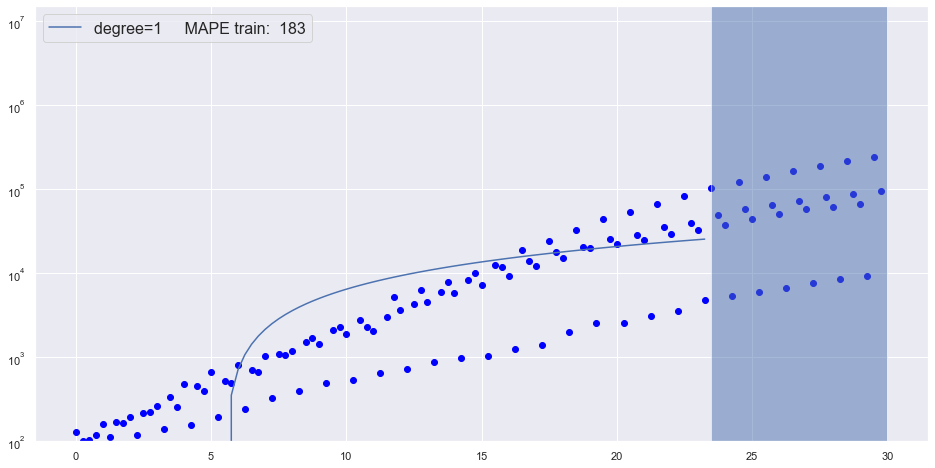

In [17]:
fig, ax1 = plt.subplots(1, 1)

ax1.scatter(np.arange(len(y))/4,y, color='blue')
ax1.axvspan((len(y)-test_points-1)/4, len(y)/4, facecolor='b', alpha=0.5)

y_hat_insample = PolynomialRegression(1).fit(X_train, y_train).predict(X_train)

ax1.plot(X_train, y_hat_insample, label='degree={0}'.format(1)+ '     MAPE train:  ' + str(mean_absolute_percentage_error(y_hat_insample, y_train))[0:3]) 


ax1.set_ylim(100, 15000000)
ax1.set_yscale('log')
ax1.legend(loc='best',
           prop={'size': 16});
           

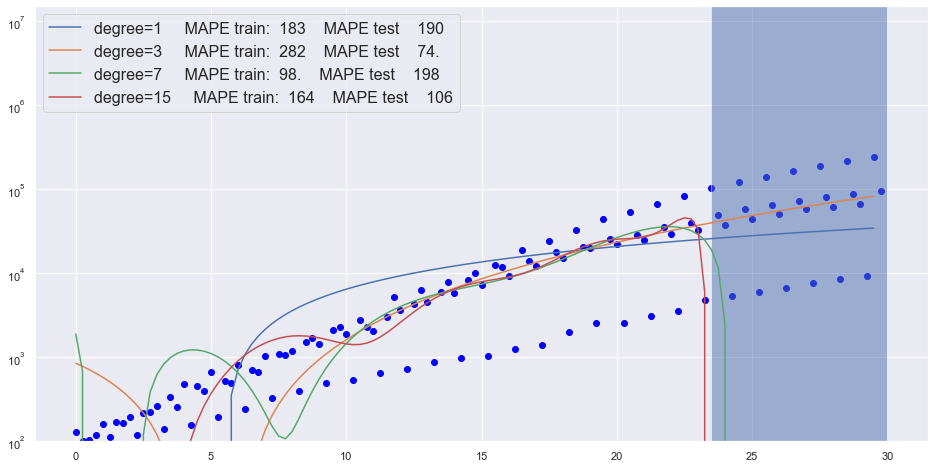

In [18]:
fig, ax1 = plt.subplots(1, 1)

ax1.scatter(np.arange(len(y))/4,y, color='blue')
ax1.axvspan((len(y)-test_points-1)/4, len(y)/4, facecolor='b', alpha=0.5)

for degree in [1,3,7,15]:
    y_hat_insaple=PolynomialRegression(degree).fit(X_train, y_train).predict(X_train)
    y_hat_test = PolynomialRegression(degree).fit(X_train, y_train).predict(X_test)



    X_plot=np.concatenate((X_train, X_test), axis=None)
    y_plot=np.concatenate((y_hat_insaple, y_hat_test), axis=None)

    ax1.plot(X_plot, y_plot, label='degree={0}'.format(degree)+ 
                 '     MAPE train:  ' + str(mean_absolute_percentage_error(y_hat_insaple, y_train))[0:3]
                 +'    MAPE test    ' +str(mean_absolute_percentage_error(y_hat_test, y_test))[0:3]) 

ax1.set_ylim(100, 15000000)
ax1.set_yscale('log')
ax1.legend(loc='best',
           prop={'size': 16});